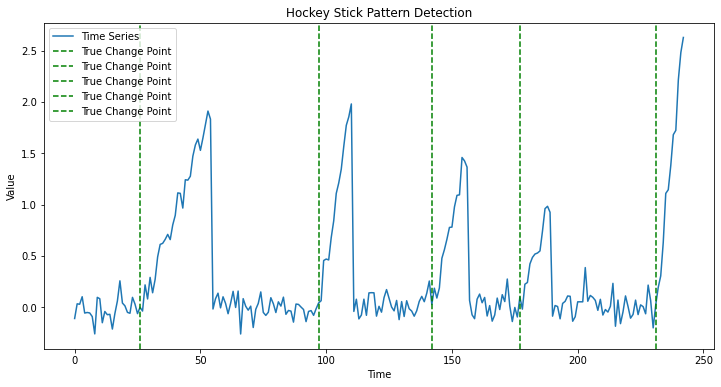

True change points: [26, 97, 142, 177, 231]
Detected change points: []


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_hockey_stick_data(num_points, num_patterns, noise_level=0.1):
    data = []
    change_points = []
    for _ in range(num_patterns):
        flat_length = np.random.randint(20, 50)
        rise_length = np.random.randint(10, 30)
        
        flat_part = np.random.normal(0, noise_level, flat_length)
        rise_part = np.linspace(0, np.random.uniform(1, 3), rise_length) + np.random.normal(0, noise_level, rise_length)
        
        pattern = np.concatenate([flat_part, rise_part])
        data.extend(pattern)
        change_points.append(len(data) - rise_length)
    
    return np.array(data), change_points

def detect_hockey_stick_patterns(data, window_size=10, threshold=0.5):
    rates_of_change = np.abs(np.diff(data))
    smoothed_rates = np.convolve(rates_of_change, np.ones(window_size)/window_size, mode='valid')
    
    change_points = []
    for i in range(len(smoothed_rates)):
        if smoothed_rates[i] > threshold and (len(change_points) == 0 or i - change_points[-1] > window_size):
            change_points.append(i)
    
    return change_points

def plot_results(data, true_change_points, detected_change_points):
    plt.figure(figsize=(12, 6))
    plt.plot(data, label='Time Series')
    for cp in true_change_points:
        plt.axvline(x=cp, color='g', linestyle='--', label='True Change Point')
    for cp in detected_change_points:
        plt.axvline(x=cp, color='r', linestyle=':', label='Detected Change Point')
    plt.legend()
    plt.title('Hockey Stick Pattern Detection')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

# Example usage
np.random.seed(42)
num_points = 500
num_patterns = 5

# Generate synthetic data
data, true_change_points = generate_hockey_stick_data(num_points, num_patterns)

# Detect hockey stick patterns
detected_change_points = detect_hockey_stick_patterns(data)

# Plot results
plot_results(data, true_change_points, detected_change_points)

print("True change points:", true_change_points)
print("Detected change points:", detected_change_points)